<a href="https://colab.research.google.com/github/Jo-009/ML_CA/blob/Ver.2/ML_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CA Specifications
1. A Fruits dataset is provided for this project, and it has images of (1) 
   apples, (2)oranges, (3) bananas and (4) a mix of apples, oranges and 
   bananas.
2. Your task is to implement a CNN to recognize the 4 classes accurately.
3. Use the images in the “train” folder to train your image classifier.
4. Then, test the accuracy of your image classifier using images from the 
   “test” folder.
5. Document all your experiments and results. For example, what was done to
   increase the accuracy of your image classifier (e.g. image augmentation).
6. Use Matplotlib to produce any plots that help the reader understand your
   work better.
   
### Submission
The deadline for this project is <b>28 Nov 2021, 6pm</b>.
Please name your submission as <Your_Team_Number><A_or_B>.ipynb. For
example, if you are in Team 1A, then your filename should be Team1A.ipynb.

### Steps

Load and preprocess data
    import required libraries
    import images
    multi class classification problem (4 classes)--> one-hot encode
    create validation set from training data -->
        # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Define model Architecture i.e. hyperparameters of model


Training Model
    training img and their corresponding true labels
    validation img and corresponding true labels
- E.g. model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Estimate model's performance
    - load test data (img) and go through pre-processing 
        test = pd.read_csv('test.csv')
    - read and store all test images
        test_image = []
           for i in tqdm(range(test.shape[0])):
               img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
                img = image.img_to_array(img)
                img = img/255
                test_image.append(img)
            test = np.array(test_image)
    #make predictions
        # prediction = model.predict_classes(test)

        

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image

## Preprocessing and Loading Data

Derive x_train,x_test,x_val,y_train,y_test and y_val 

<b>x_train</b>: Numpy arrays of the images of the training dataset

<b>y_train</b>: Labels of the training dataset

<b>x_test</b>: Numpy arrays of the images of the testing dataset

<b>y_test</b>: Labels of the testing dataset

<b>x_val</b>: Numpy arrays of the images of the validation dataset

<b>y_val</b>: Labels of the validation dataset

In [15]:
train_ds_raw = os.listdir('/content/drive/MyDrive/Colab Notebooks/train')
test_ds_raw = os.listdir('/content/drive/MyDrive/Colab Notebooks/test')

In [28]:
type(train_ds_raw), len(train_ds_raw)

(list, 480)

### Create X_train

In [41]:
filenames = []
for label in train_ds_raw:
    if label[-3:] == 'xml':
        continue
    else:
        filenames.append("/content/drive/MyDrive/Colab Notebooks/train/" + label)

### Create y_train label

In [42]:
y_train_label = []

for label in train_ds_raw:
    if label[-3:] == 'xml':
        continue
    arr = label.split('_')
    y_train_label.append(arr[0])


In [43]:
len(filenames), len(y_train_label)

(240, 240)

### Create df to visualize datasets

In [44]:
df = pd.DataFrame(columns=['filenames'], data=filenames)

In [45]:
df['y_train'] = y_train_label

In [ ]:
df

In [47]:
img = cv2.imread(filenames[0], cv2.IMREAD_COLOR)
img.shape

(436, 652, 3)

### Plot Histogram to set size of images

In [48]:
# plot histogram
# decide which is the more common size for img
# Getting the dimensions of all the image into a list
dim1 = []
dim2 = []
colors = []

for img_filename in filenames:
    x, y, c = plt.imread(img_filename).shape
    dim1.append(x)
    dim2.append(y)
    colors.append(c)

In [49]:
dim1 = np.array(dim1)
dim2 = np.array(dim2)
colors = np.array(colors)

In [50]:
dim1.max(), dim2.max(), colors.mean()

(4605, 3160, 3.1083333333333334)

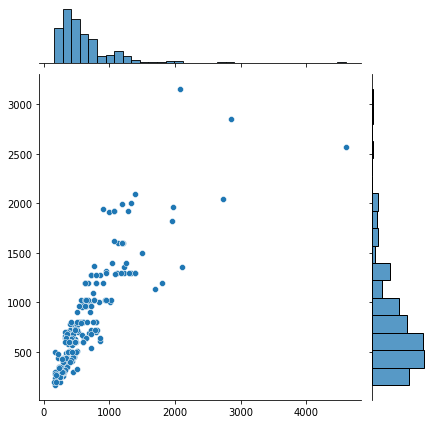

In [51]:
sns.jointplot(x=dim1, y=dim2);

In [52]:
dim1.mean(), dim2.mean()

(633.5083333333333, 789.2166666666667)

resize according to findings:
*Taking the mean of the image size, we set the image size to be 650 by 650 by 3 for easier computation*
**image_size = (650, 650)**

### Resize images to proper and similar size and create x_train

In [ ]:
img = Image.open(filenames[1])
greyscale_img = img.convert('L')
img_resized = greyscale_img.resize((650,650))
img_resized

In [82]:
x_train = None

for i in range(len(y_train_label)):
    img_raw = Image.open(filenames[i])  
    greyscale_img = img_raw.convert('L')
    img_reshaped = greyscale_img.resize((650, 650))   
    if x_train is None:
        x_train = img_reshaped
    else:
        x_train = np.concatenate((x_train, img_reshaped))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[[ 83  83  83 ...  99  99  99]
 [ 83  83  83 ...  98  98  98]
 [ 84  84  84 ...  97  97  97]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Verify data shaped correctly 

In [98]:
x_train = x_train.reshape(-1, 650, 650, 3)
x_train.shape

(80, 650, 650, 3)

Verify that data is shaped correctly by randomly retrieving an individual data to view

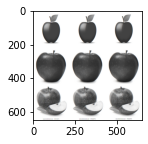

In [103]:
# img2 = Image.fromarray(x_train[1])
# --> bug in scipy so shape can throw error
img2 = np.array(Image.fromarray((x_train[1] * 255).astype(np.uint8)).convert('RGB'))
plt.subplots(figsize=(2,2))
plt.imshow(img2)

**Determine max value of each cell and min before normalizing**

In [86]:
x_train.max(), x_train.min()

(255, 0)

**Normalize dataset**

In [123]:
x_train = x_train/255
print(x_train)

[[[[1.96298676e-08 1.96298676e-08 1.96298676e-08]
   [1.96298676e-08 1.96298676e-08 1.96298676e-08]
   [1.96298676e-08 1.96298676e-08 1.98663720e-08]
   ...
   [2.27044252e-08 2.27044252e-08 2.27044252e-08]
   [2.27044252e-08 2.27044252e-08 2.29409296e-08]
   [2.29409296e-08 2.29409296e-08 2.29409296e-08]]

  [[2.01028765e-08 2.01028765e-08 2.01028765e-08]
   [2.01028765e-08 2.01028765e-08 2.01028765e-08]
   [2.01028765e-08 2.01028765e-08 2.03393809e-08]
   ...
   [2.22314163e-08 2.22314163e-08 2.22314163e-08]
   [2.22314163e-08 2.22314163e-08 2.29409296e-08]
   [2.29409296e-08 2.29409296e-08 2.29409296e-08]]

  [[2.05758853e-08 2.05758853e-08 2.05758853e-08]
   [2.05758853e-08 2.05758853e-08 2.05758853e-08]
   [2.05758853e-08 2.05758853e-08 2.10488942e-08]
   ...
   [2.19949119e-08 2.19949119e-08 2.19949119e-08]
   [2.19949119e-08 2.19949119e-08 2.17584075e-08]
   [2.17584075e-08 2.17584075e-08 2.17584075e-08]]

  ...

  [[6.03086294e-08 6.03086294e-08 6.03086294e-08]
   [6.03086294e-

One-Hot Encoding data using keras to_categorical

In [105]:
# labels = np.unique(y_train_label)
# labels

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [92]:
# n_labels = len(labels)
# n_labels

4

In [129]:
#Use one-hot encoding to label class and for prediction later
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#define data
fruits = [
    'apple',
    'orange',
    'banana',
    'mixed'
]

#instantiate one hot encoding
encoder = LabelEncoder()
#fit
encoder.fit(fruits)
#transform
data = encoder.transform(fruits)

z = tf.keras.utils.to_categorical(data)

y_train = np.array(z)

# categories = pd.DataFrame(data=z,
#                  columns=encoder.classes_)
# print(categories)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


### Defining Model Architecture
Things like: 
- how many convolutional layers do we want
- what should be the activation function for each layer
- how many hidden units should each layer have etc

#### Construct CNN Model

- Create an empty Neural Network via Sequential()
- Add more layers to 'model' obj to turn it into CNN
- First layer--> convolutional layer(filters,kernal_size,activation,input_shape)


In [124]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                activation = 'relu', 
                                input_shape= (650,650,3)))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),
#                                 activation = 'relu', 
#                                 input_shape= (650,650,3)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
#                                 activation = 'relu', 
#                                 input_shape= (650,650,3)))
# model pooling, dropout, dense (need to flatten first) 
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512,activation='relu'))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid')) 
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 648, 648, 16)      448       
                                                                 
 flatten_1 (Flatten)         (None, 6718464)           0         
                                                                 
 dense_1 (Dense)             (None, 2)                 13436930  
                                                                 
Total params: 13,437,378
Trainable params: 13,437,378
Non-trainable params: 0
_________________________________________________________________


- When using Softmax as the activation function as the last layer, our loss function should be ‘categorical_crossentropy’
- Optimizers are algorithms to change the weights and the learning rate of our neural network; ‘adam’ is a good choice
- When determining the accuracy of a prediction, use ‘accuracy’ as the metrics as we can count the number of times the neural network has given a correct prediction

In [126]:
#compiling the CNN
# model.compile(optimizer = RMSprop(learning_rate=0.001),
#             loss='categorical_crossentropy', 
#              metrics =['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

Require training images and their corresponding true labels, validation images and their corresponding true labels (we use these labels only to validate the model and not during the training phase). We also define the number of epochs in this step. For starters, we will run the model for 10 epochs (you can change the number of epochs later).

#### can consider using k-means to calculate epochs

In [130]:
fitting = model.fit(x_train, y_train, epochs=20)

ValueError: ignored

### Estimate Performance- Test accuracy

Load the test data (images) and go through the pre-processing step here as well. We then predict the classes for these images using the trained model.